## Water Quality Additional Step
Ben Ries-Roncalli

May 19th, 2022

$\rightarrow$ Import the necessary packages

In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#SVC
from sklearn.svm import SVC
from sklearn import svm

# Neural Network Classifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score # for accuracy metrics & confusion matrices
from sklearn.preprocessing import StandardScaler # for data preprocessing
%matplotlib inline

$\rightarrow$ Load in the training and testing data sets from the RMarkdown file. These should be the same as the ones used in R for fair comparisons between the models.

In [3]:
#Load in the test & train splits
df_train = pd.read_csv('wells_train.csv')
df_test = pd.read_csv('wells_test.csv')
df_train.head()

,switch_well,arsenic,distance,association,education
0,0,2.07,0.20967,0,10
1,0,2.80,1.07691,0,0
2,0,0.81,1.07691,0,0
3,0,1.92,1.07691,1,0
4,0,3.95,1.07691,0,0


In [4]:
df_train.shape

(2415, 5)

$\rightarrow$ Reshape the data to work with the sklearn models

In [5]:
#reshape for modeling
X_train = df_train.drop('switch_well', axis=1)
X_test = df_test.drop('switch_well', axis=1)

y_train = df_train['switch_well']
y_test = df_test['switch_well']

$\rightarrow$ Normalize the variables

In [6]:
#Standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## RANDOM FOREST CLASSIFIER
This is another decision tree method, here we can quickly compare it to the XGBoost model in R.

$\rightarrow$ Build the random forest classifier and predict on the test data.

In [9]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

$\rightarrow$ Get measurements of the accuracy of the predictions of the random forest model.

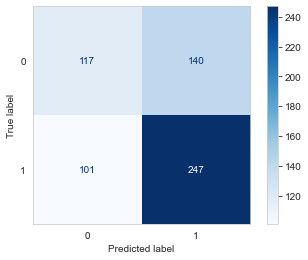

Accuracy 0.602
Sensitivity:  0.71
Specificity:  0.455


In [10]:
# get metrics on predictions
tn, fp, fn, tp = confusion_matrix(y_test, pred_rfc).ravel()
rfc_accuracy = round(accuracy_score(y_test, pred_rfc), 3)
rfc_sensitivity = round(tp / (tp + fn), 3)
rfc_specificity = round(tn / (tn+fp), 3)

# display metrics
plot_confusion_matrix(rfc, X_test, y_test, cmap="Blues")  
plt.grid(False)
plt.show()
print('Accuracy', rfc_accuracy)
print('Sensitivity: ', rfc_sensitivity)
print('Specificity: ', rfc_specificity)

$\rightarrow$ Extract the importance of the variables in the random forest model.

Feature: arsenic, Score: 0.38522
Feature: distance, Score: 0.45073
Feature: association, Score: 0.03696
Feature: education, Score: 0.12708


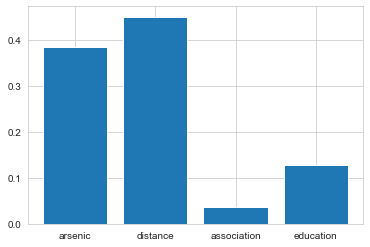

In [11]:
importance = rfc.feature_importances_
features_names = ['arsenic', 'distance', 'association', 'education']
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (features_names[i],v))
# plot feature importance
x = [0, 1, 2, 3]
ax1 = plt.subplot()
ax1.set_xticks(x)
plt.bar([x for x in range(len(importance))], importance)

ax1.set_xticklabels(features_names) 
plt.show()

`arsenic` and `distance` dominate the random forest model in terms of importance. `association` is by far the least important predictor in the random forest model.

## SUPPORT VECTOR MACHINE (SVM)
This model, too, works somewhat similarly to a decision tree model in some ways.

$\rightarrow$ Build the support vector machine classifier and predict on the test data.

In [16]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

$\rightarrow$ Get measurements of the accuracy of the predictions of the SVM classifier.

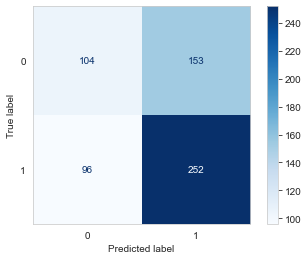

Accuracy 0.588
Sensitivity:  0.724
Specificity:  0.405


In [17]:
# get metrics on predictions
tn, fp, fn, tp = confusion_matrix(y_test, pred_clf).ravel()
clf_accuracy = round(accuracy_score(y_test, pred_clf), 3)
clf_sensitivity = round(tp / (tp + fn), 3)
clf_specificity = round(tn / (tn+fp), 3)

# display metrics
plot_confusion_matrix(clf, X_test, y_test, cmap="Blues")  
plt.grid(False)
plt.show()
print('Accuracy', clf_accuracy)
print('Sensitivity: ', clf_sensitivity)
print('Specificity: ', clf_specificity)

Since we did not set `kernel = "linear"` in our SVM model, we cannot extract the importance of the predictors as easily.

## NEURAL NETWORK

Here we will use two hidden layers with 4 neurons each.

$\rightarrow$ Build the neural network and predict on the test data.

In [38]:
mlpc = MLPClassifier(hidden_layer_sizes=(4, 4), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

$\rightarrow$ Get measurements of the accuracy of the predictions of the neural network.

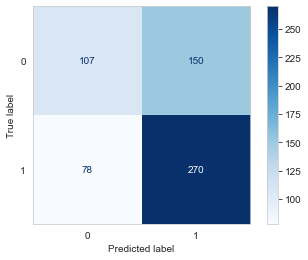

Accuracy 0.623
Sensitivity:  0.776
Specificity:  0.416


In [39]:
# get metrics on predictions
tn, fp, fn, tp = confusion_matrix(y_test, pred_mlpc).ravel()
mlpc_accuracy = round(accuracy_score(y_test, pred_mlpc), 3)
mlpc_sensitivity = round(tp / (tp + fn), 3)
mlpc_specificity = round(tn / (tn+fp), 3)

# display metrics
plot_confusion_matrix(mlpc, X_test, y_test, cmap="Blues")  
plt.grid(False)
plt.show()
print('Accuracy', mlpc_accuracy)
print('Sensitivity: ', mlpc_sensitivity)
print('Specificity: ', mlpc_specificity)